In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
pd.set_option('display.max_columns', None)


In [470]:
df=pd.read_csv('datasets/SCMS_Delivery_History_Dataset.csv')

In [471]:
df.head(20)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,28-Sep-06,28-Sep-06,28-Sep-06,ARV,Pediatric,Aurobindo Pharma Limited,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",Zidovudine,Generic,10mg/ml,Oral solution,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,Pre-PQ Process,Date Not Captured,8-Jan-07,8-Jan-07,8-Jan-07,ARV,Pediatric,MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK ...,"Efavirenz 200mg [Stocrin/Sustiva], capsule, 90...",Efavirenz,Stocrin/Sustiva,200mg,Capsule,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,24-Nov-06,24-Nov-06,24-Nov-06,ARV,Adult,Aurobindo Pharma Limited,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,7-Dec-06,7-Dec-06,7-Dec-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,Pre-PQ Process,11/13/06,30-Jan-07,30-Jan-07,30-Jan-07,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [473]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Country Name')

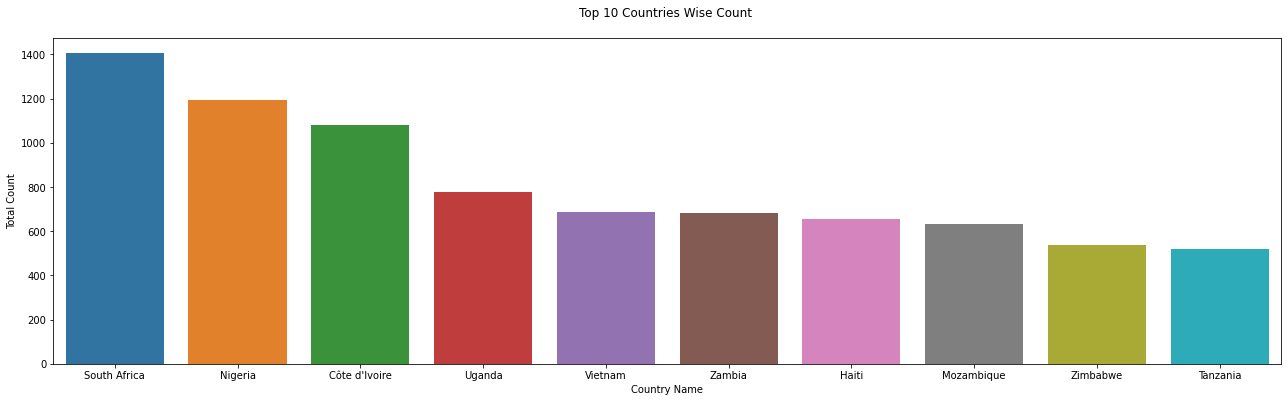

In [474]:
plt.figure(figsize=(22,6))
sn.countplot(df['Country'],order = df['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

Total Pack Price for Top 15 Countries

Country
Nigeria          25620.72
South Africa     24318.90
Côte d'Ivoire    22882.35
Haiti            19521.30
Uganda           15664.08
Mozambique       14092.40
Vietnam          11963.78
Zambia           11889.67
Tanzania         11047.72
Rwanda            7724.29
Botswana          7052.54
Zimbabwe          6563.56
Kenya             6349.14
Congo, DRC        6032.41
Guyana            5659.35
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

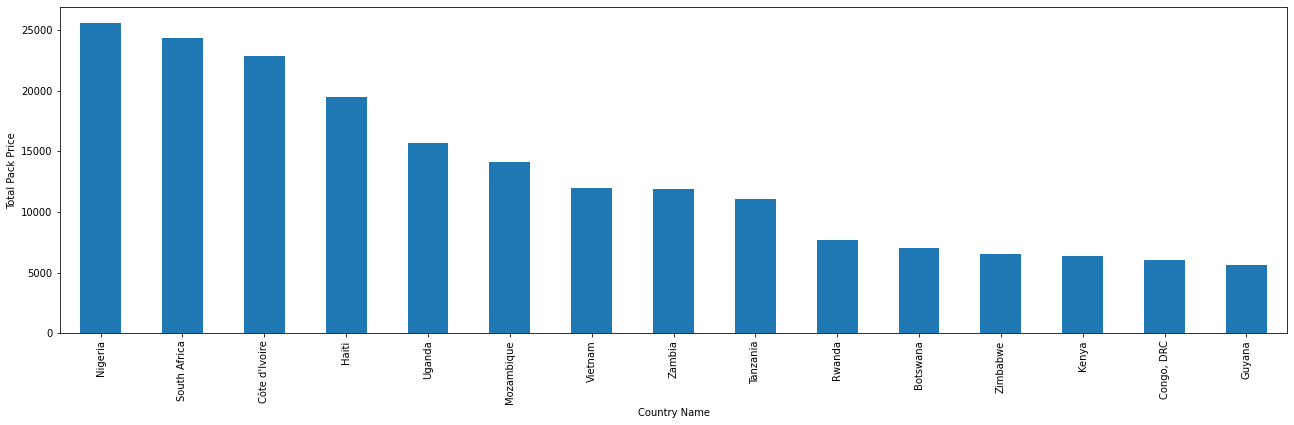

In [475]:
TotalPrice = df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

In [476]:
ShippingMode = df["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")


Text(0.5, 0, 'Manufacturing Site Name')

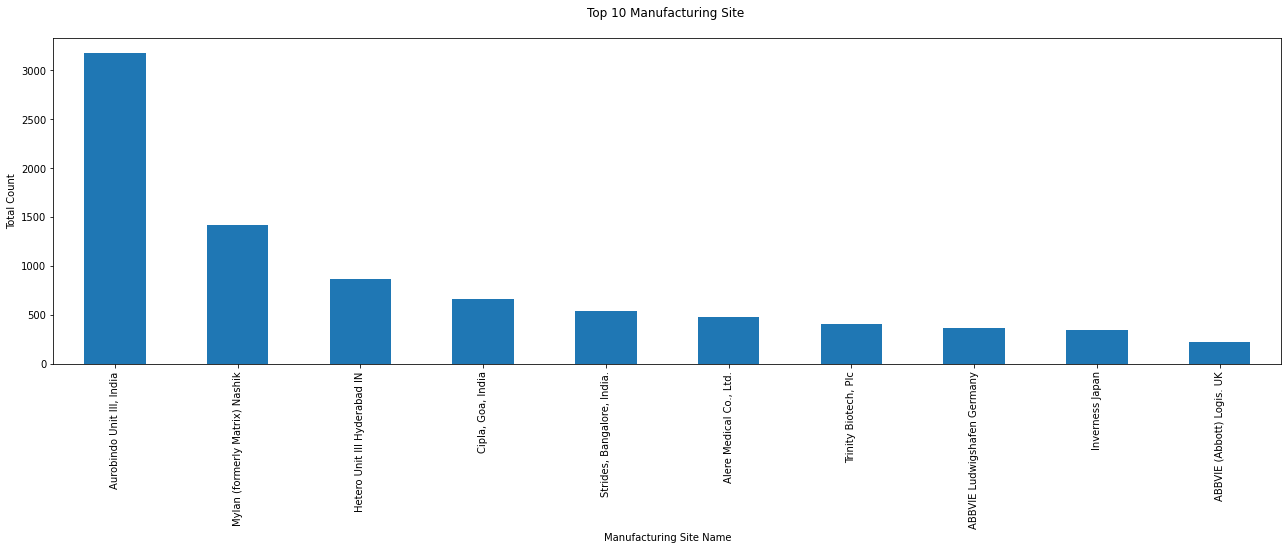

In [477]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=df.groupby('Manufacturing Site').size().nlargest(10)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1694
Mylan (formerly Matrix) Nashik     695
Alere Medical Co., Ltd.            473
Hetero Unit III Hyderabad IN       417
Trinity Biotech, Plc               383
Inverness Japan                    320
ABBVIE Ludwigshafen Germany        285
Cipla, Goa, India                  274
Strides, Bangalore, India.         256
ABBVIE (Abbott) Logis. UK          150
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

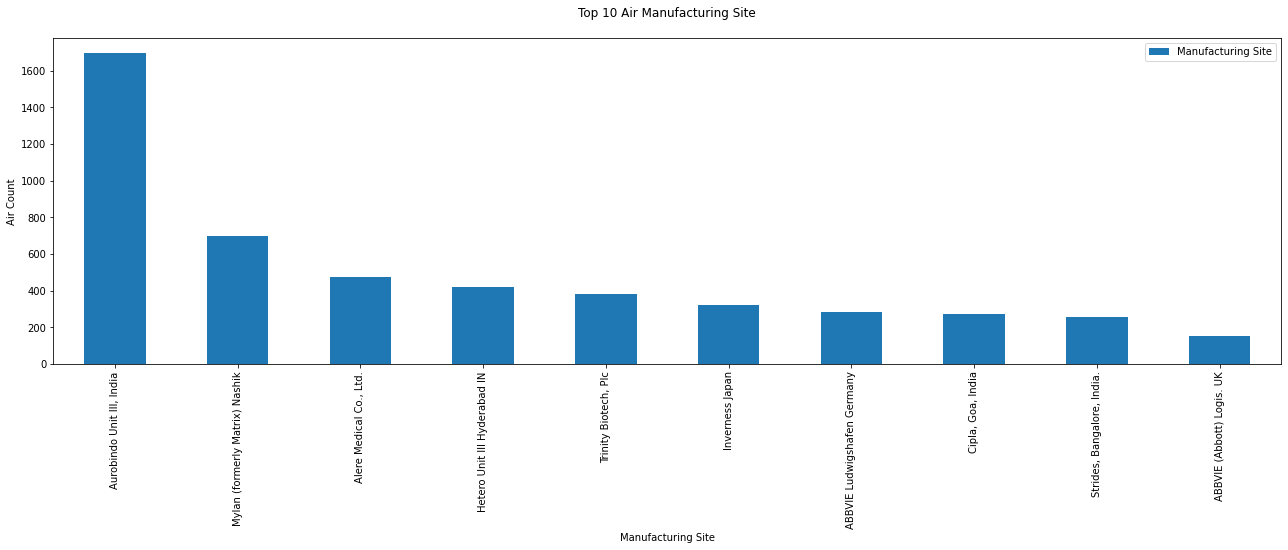

In [478]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData=df[df['Shipment Mode']=='Air']
df[df["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = df[df["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

In [479]:
df1=pd.get_dummies(df['Fulfill Via'])


In [480]:
df2=pd.get_dummies(df['First Line Designation'])

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Fulfill Via', ylabel='count'>

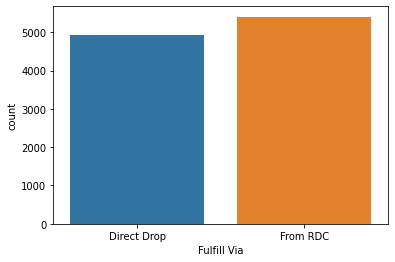

In [481]:
sns.countplot('Fulfill Via',data=df)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='First Line Designation', ylabel='count'>

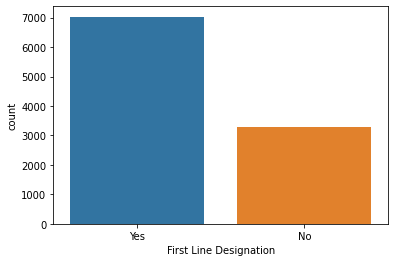

In [482]:
sns.countplot('First Line Designation',data=df)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



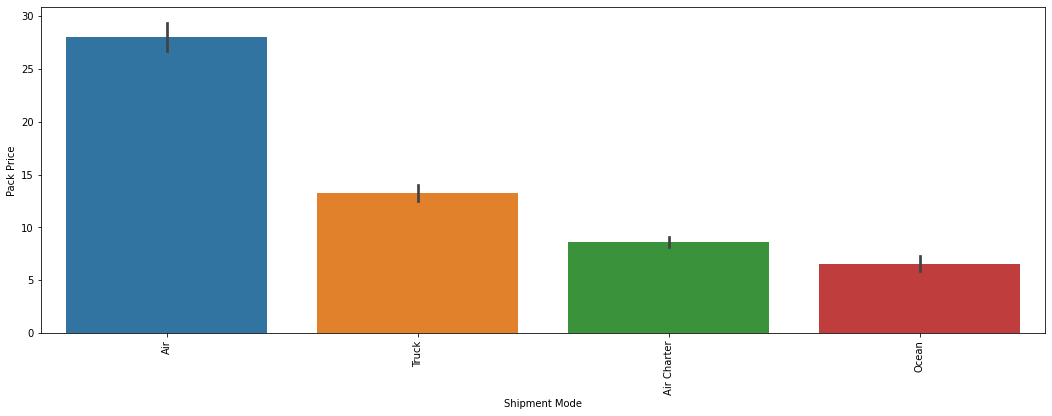

In [483]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot('Shipment Mode','Pack Price', data = df)
plt.show()

In [484]:
def preprocess_input(df,label_mapping):
    df=df.copy()
    #Drop Id column
    df=df.drop('ID',axis=1)
    #Drop missing target rows
    missing_target_rows=df[df['Shipment Mode'].isna()].index
    df=df.drop(missing_target_rows,axis=0).reset_index(drop=True)
    # Fiiling missing values 
    df['Dosage']= df['Dosage'].fillna(df['Dosage'].mode()[0])
    df['Line Item Insurance (USD)']= df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())
    
    # drop data column with to many missing values
    df = df.drop(['PQ First Sent to Client Date', 'PO Sent to Vendor Date'], axis=1)
   
    # Extract date feature
    for column in ['Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + ' Year'] = df[column].apply(lambda x: x.year)
        df[column + ' Month'] = df[column].apply(lambda x: x.month)
        df[column + ' Day'] = df[column].apply(lambda x: x.day)
        df = df.drop(column, axis=1)
    # Drop numeric cloumn with to many missing values
    df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis=1)
    # Drop high-cardinality columns
    df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis=1)
    # Binary encoding
    df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
    df['First Line Designation'] = df['First Line Designation'].replace({'No': 0, 'Yes': 1})
     # One-hot encoding
    for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    # Split df into X and y
    y = df['Shipment Mode']
    X = df.drop('Shipment Mode', axis=1)
    
    # Encode the labels
    y = y.replace(label_mapping)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test


In [485]:
LABEL_MAPPING = {
    'Air': 0,
    'Truck': 1,
    'Air Charter': 2,
    'Ocean': 3
}

X_train, X_test, y_train, y_test = preprocess_input(df, label_mapping=LABEL_MAPPING)

In [486]:
X_train

Fulfill Via  Unit of Measure (Per Pack)  Line Item Quantity  \
8905     0.975074                   -0.228739           -0.426393   
1414     0.975074                   -0.228739            0.198248   
1409     0.975074                   -0.228739            0.532553   
874     -1.025563                    0.291362           -0.450154   
1941     0.975074                   -0.618816            0.159722   
...           ...                         ...                 ...   
2895    -1.025563                   -0.228739           -0.407975   
7813     0.975074                   -0.228739           -0.005566   
905     -1.025563                   -0.618816            1.611276   
5192    -1.025563                    0.291362           -0.281635   
235     -1.025563                   -0.228739           -0.455200   

      Line Item Value  Pack Price  Unit Price  First Line Designation  \
8905        -0.442833   -0.365576   -0.221030                0.673216   
1414         0.418854   -0.218907   -0.172736                0.673216   
1409         0.366882   -0.309884   -0.203468                0.673216   
874         -0.274234    2.493413    0.354098                0.673216   
1941         0.338381   -0.227409   -0.093711                0.673216   
...               ...         ...         ...                     ...   
2895        -0.436590   -0.377267   -0.225420               -1.485408   
7813        -0.331187   -0.409364   -0.238591                0.673216   
905          2.247912   -0.223796   -0.093711                0.673216   
5192         1.413370    1.430592    0.134584                0.673216   
235         -0.449668   -0.131330   -0.142004               -1.485408   

      Line Item Insurance (USD)  Scheduled Delivery Date Year  \
8905                  -0.471452                      1.087860   
1414                   0.702302                     -0.994006   
1409                   0.632237                     -0.994006   
874                   -0.278564                     -1.410379   
1941                   0.593803                     -0.994006   
...                         ...                           ...   
2895                  -0.467031                      1.087860   
7813                  -0.358993                      0.255114   
905                    2.497515                     -1.410379   
5192                   2.296044                     -0.577633   
235                   -0.468751                     -0.994006   

      Scheduled Delivery Date Month  Scheduled Delivery Date Day  \
8905                       0.760567                     1.293380   
1414                       0.456201                    -1.471641   
1409                      -0.152532                    -0.195478   
874                       -1.674365                     0.017216   
1941                      -0.456899                    -1.046253   
...                             ...                          ...   
2895                       1.064934                     0.229910   
7813                       0.760567                     1.080686   
905                        0.760567                     0.548951   
5192                       1.369300                    -0.620866   
235                       -1.065632                     1.293380   

      Delivered to Client Date Year  Delivered to Client Date Month  \
8905                       1.088220                        0.154064   
1414                      -0.985911                        0.454943   
1409                      -0.985911                       -0.146816   
874                       -1.400738                       -1.651214   
1941                      -0.985911                       -0.447695   
...                             ...                             ...   
2895                       1.088220                        1.056703   
7813                       0.258568                        1.056703   
905                       -1.400738                        0.75

In [487]:
y_train

8905    1
1414    2
1409    2
874     0
1941    2
       ..
2895    3
7813    1
905     0
5192    0
235     0
Name: Shipment Mode, Length: 6974, dtype: int64

In [488]:
X_test

Fulfill Via  Unit of Measure (Per Pack)  Line Item Quantity  \
7784     0.975074                   -0.228739           -0.280889   
7287     0.975074                   -0.228739           -0.454827   
1011     0.975074                    2.111717           -0.393459   
3108    -1.025563                   -0.228739           -0.461116   
9890     0.975074                   -0.618816            5.690043   
...           ...                         ...                 ...   
9897     0.975074                   -0.228739            1.172852   
6557     0.975074                   -0.618816            1.202306   
8189     0.975074                   -0.618816           -0.447371   
4145    -1.025563                   -0.748841           -0.449235   
1684     0.975074                    0.551413           -0.455697   

      Line Item Value  Pack Price  Unit Price  First Line Designation  \
7784        -0.286687   -0.285652   -0.194688                0.673216   
7287        -0.452430   -0.222733   -0.172736                0.673216   
1011        -0.441932   -0.409364   -0.251762                0.673216   
3108        -0.460583   -0.188723   -0.163956               -1.485408   
9890         7.298107   -0.232086   -0.098102               -1.485408   
...               ...         ...         ...                     ...   
9897         0.251971   -0.381943   -0.229810                0.673216   
6557         1.654981   -0.230173   -0.098102                0.673216   
8189        -0.454347   -0.371528   -0.194688               -1.485408   
4145        -0.414871    0.218976    0.446294                0.673216   
1684        -0.432716    0.412409   -0.106882                0.673216   

      Line Item Insurance (USD)  Scheduled Delivery Date Year  \
7784                  -0.286267                      0.255114   
7287                  -0.474393                      0.255114   
1011                  -0.463149                     -1.410379   
3108                  -0.483997                      1.087860   
9890                   5.002878                      1.087860   
...                         ...                           ...   
9897                   0.019921                      1.087860   
6557                   1.316398                      1.087860   
8189                  -0.476574                     -0.161259   
4145                  -0.421835                     -0.994006   
1684                  -0.453006                     -1.410379   

      Scheduled Delivery Date Month  Scheduled Delivery Date Day  \
7784                      -0.761265                     0.974339   
7287                      -1.369998                     1.187033   
1011                      -0.761265                     0.017216   
3108                       1.369300                     1.080686   
9890                       0.456201                     1.399727   
...                             ...                          ...   
9897                      -0.152532                     1.293380   
6557                      -1.065632                    -0.833559   
8189                      -0.152532                    -0.514519   
4145                       0.760567                    -0.727212   
1684                      -0.152532                     0.017216   

      Delivered to Client Date Year  Delivered to Client Date Month  \
7784                       0.258568                       -0.748575   
7287                       0.258568                       -1.350334   
1011                      -1.400738                       -0.748575   
3108                       1.088220                        1.357582   
9890                       1.088220                        0.154064   
...                             ...                             ...   
9897                       1.088220                       -0.146816   
6557                       1.088220                       -1.350334   
8189                      -0.156259                       -0.14

In [489]:
y_test

7784    1
7287    1
1011    0
3108    1
9890    1
       ..
9897    2
6557    1
8189    0
4145    0
1684    0
Name: Shipment Mode, Length: 2990, dtype: int64

In [490]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [491]:
df['Dosage'].unique()

array([nan, '10mg/ml', '150mg', '30mg', '200mg', '200/50mg', '150/300mg',
       '2g', '300mg', '1mg/ml', '600mg', '25mg', '20mg', '250mg', '400mg',
       '20/120mg', '50+153mg', '600/200/300mg', '100mg', '80/20mg/ml',
       '600mg/2ml', '150/200/30mg', '100/25mg', '50mg', '15mg',
       '300/200mg', '150/300/200mg', '133.3/33.3mg', '80mg/ml', '30/6mg',
       '20mg/ml', '40mg', '300/150/300mg', '500/25mg', '30/50/6mg',
       '150/300+200mg', '150/30mg', '150/200/40mg', '30mg/ml',
       '200/300mg', '150/300+300mg', '300/300mg', '60/100/12mg',
       '600/300/300mg', '300/100mg', '30/60mg', '60/30mg', '30/50/60mg',
       '500mg', '125mg', '600/300mg', '60mg', '60/12mg',
       '150/300mg+600mg', '50mg/g'], dtype=object)

In [492]:
df.isna().mean()

ID                              0.000000
Project Code                    0.000000
PQ #                            0.000000
PO / SO #                       0.000000
ASN/DN #                        0.000000
Country                         0.000000
Managed By                      0.000000
Fulfill Via                     0.000000
Vendor INCO Term                0.000000
Shipment Mode                   0.034870
PQ First Sent to Client Date    0.000000
PO Sent to Vendor Date          0.000000
Scheduled Delivery Date         0.000000
Delivered to Client Date        0.000000
Delivery Recorded Date          0.000000
Product Group                   0.000000
Sub Classification              0.000000
Vendor                          0.000000
Item Description                0.000000
Molecule/Test Type              0.000000
Brand                           0.000000
Dosage                          0.168152
Dosage Form                     0.000000
Unit of Measure (Per Pack)      0.000000
Line Item Quanti

In [493]:
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Project Code': 142,
 'PQ #': 1237,
 'PO / SO #': 6233,
 'ASN/DN #': 7030,
 'Country': 43,
 'Managed By': 4,
 'Fulfill Via': 2,
 'Vendor INCO Term': 8,
 'Shipment Mode': 5,
 'PQ First Sent to Client Date': 765,
 'PO Sent to Vendor Date': 897,
 'Scheduled Delivery Date': 2006,
 'Delivered to Client Date': 2093,
 'Delivery Recorded Date': 2042,
 'Product Group': 5,
 'Sub Classification': 6,
 'Vendor': 73,
 'Item Description': 184,
 'Molecule/Test Type': 86,
 'Brand': 48,
 'Dosage': 55,
 'Dosage Form': 17,
 'Manufacturing Site': 88,
 'First Line Designation': 2,
 'Weight (Kilograms)': 4688,
 'Freight Cost (USD)': 6733}

In [494]:
#date_feature={
#    'Scheduled Delivery Date',
#    'Delivered to Client Date',
#    'Delivery Recorded Date',
#}

#for column in date_feature:
#    print(column, pd.to_datetime(df[column],errors='coerce').isna().mean())

In [495]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [496]:
inputs = tf.keras.Input(shape=(771,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
175/175 [==============================] - 1s 4ms/step - loss: 0.6176 - accuracy: 0.7564 - val_loss: 0.3103 - val_accuracy: 0.8753
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9143 - val_loss: 0.2872 - val_accuracy: 0.8810
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9123 - val_loss: 0.2706 - val_accuracy: 0.8882
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9285 - val_loss: 0.2834 - val_accuracy: 0.8903
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9391 - val_loss: 0.2870 - val_accuracy: 0.8832
Epoch 6/100
175/175 [==============================] - 0s 3ms/step - loss: 0.1495 - accuracy: 0.9373 - val_loss: 0.2790 - val_accuracy: 0.8968


Test Set Accuracy: 88.53%


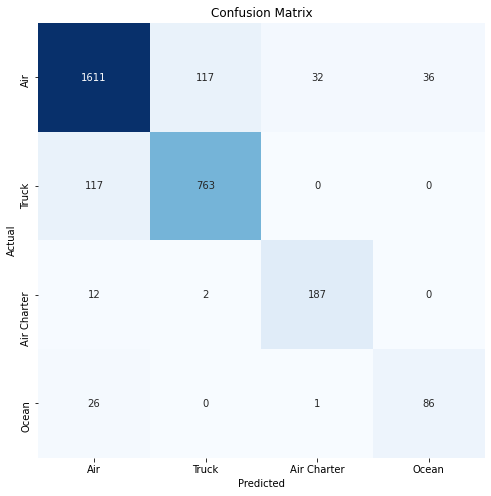

Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.91      0.90      0.90      1796
       Truck       0.87      0.87      0.87       880
 Air Charter       0.85      0.93      0.89       201
       Ocean       0.70      0.76      0.73       113

    accuracy                           0.89      2990
   macro avg       0.83      0.86      0.85      2990
weighted avg       0.89      0.89      0.89      2990



In [497]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()), target_names=list(LABEL_MAPPING.keys()))

print("Test Set Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [498]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import datasets,linear_model
from sklearn.metrics import accuracy_score,r2_score

In [501]:
lr=LinearRegression()

In [502]:
lr.fit(X_train,y_train)

LinearRegression()

In [504]:
lr.score(X_train,y_train)

0.5894606324375216

In [505]:
lr.score(X_test,y_test)

-2.629885467878672e+25

In [506]:
model=LogisticRegression()

In [509]:
model.fit(X_train,y_train)

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [510]:
prediction=model.predict(X_test)

In [511]:
acc=accuracy_score(y_test,prediction)

In [512]:
acc.mean()

0.8866220735785953

Text(0.5, 1.0, 'Confusion Matrix')

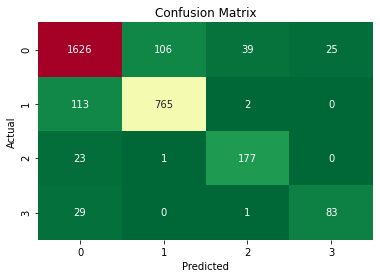

In [519]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='RdYlGn_r', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [513]:
clr = classification_report(y_test, prediction)


In [515]:
print(clr)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1796
           1       0.88      0.87      0.87       880
           2       0.81      0.88      0.84       201
           3       0.77      0.73      0.75       113

    accuracy                           0.89      2990
   macro avg       0.84      0.85      0.84      2990
weighted avg       0.89      0.89      0.89      2990

